# Hotstar Data Analysis

Views of a hotstar show went down. Here I look through the data to see if it indicates something about the decline in viewership.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
viewsdata = pd.read_csv('hotstar.csv')

In [3]:
viewsdata.head()
#viewsdata.info()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
#drop the unnecessary last column
viewsdata.drop('Unnamed: 7', axis = 1, inplace=True)
viewsdata.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [5]:

#Convert date to datetime format
viewsdata['Date'] = pd.to_datetime(viewsdata['Date']).dt.date  #just date not time
viewsdata.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [6]:
from datetime import date

start = date(2017, 2, 28)  #28th Feb 2017
now = viewsdata.Date
days = now - start

viewsdata['days'] = days
viewsdata.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [7]:
# getting rid of "days"
viewsdata['days'] = viewsdata['days'].astype(str)
viewsdata['days'] = viewsdata['days'].map(lambda x : x[0:2])
viewsdata['days'] = viewsdata['days'].astype(int)

viewsdata.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


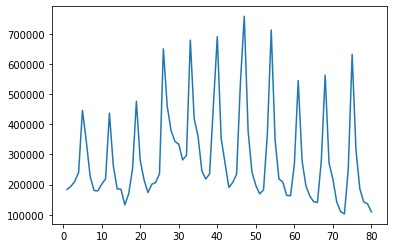

In [8]:
# Days vs. Views plot
plt.plot(viewsdata.days, viewsdata.Views_show)

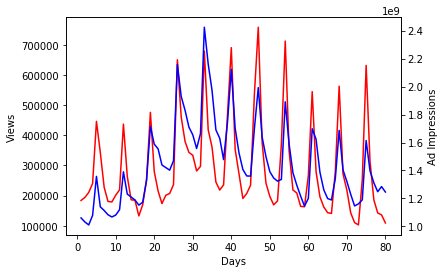

In [9]:
# Combined plot for days vs. Views_show and vs. Ad_Impression
fig = plt.figure()
host = fig.add_subplot(111)

ax1 = host.twinx() #duplicate x-axis

host.set_xlabel("Days")
host.set_ylabel("Views")
ax1.set_ylabel("Ad Impressions")

p1 = host.plot(viewsdata.days, viewsdata.Views_show, color='r', label="Views")
p2 = ax1.plot(viewsdata.days, viewsdata.Ad_impression, color='b', label="Ad Impressions")

# Here we can see that the ad impressions are highly correlated with the views

In [10]:
# Deriving a weekday column
viewsdata['weekday'] = (viewsdata['days']+3)%7
viewsdata.weekday.replace(0, 7, inplace=True)   #replace 0 with 7
viewsdata.head()
# 1 = Sun; 7 = Sat

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


## Making regression models to predict Views

First model with Visitors and weekday as feature variable

In [11]:
X = viewsdata[['Visitors', 'weekday']]
y = viewsdata['Views_show']  #response variable

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr1 = LinearRegression()
lr1.fit(X,y)
lr1.score(X, y) #R2 score

0.48503155874601855

In [13]:
# Now let's assimilate the weekdays and weekends as behaviors are similar
# weekends = 1; weekdays = 0

def weekendify(i):
    if i % 7 == 5: i = 1
    elif i % 7 == 4: i = 1
    else:
        i = 0
    return i

viewsdata['weekend'] = [weekendify(i) for i in viewsdata['days']]
viewsdata.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


Second model with Visitors and weekend

In [14]:
X = viewsdata[['Visitors', 'weekend']]
y = viewsdata['Views_show']

lr2 = LinearRegression()
lr2.fit(X, y)
lr2.score(X, y)  #slightly better

0.5003124021200631

Third model with Visitors, Weekend and if Character_A shows up

In [15]:
X = viewsdata[['Visitors', 'weekend', 'Character_A']]
y = viewsdata['Views_show']

lr3 = LinearRegression()
lr3.fit(X, y)
lr3.score(X, y)  #seems like Character_A is important

0.5858734080979339

Now let's try to create a lag_views variable. The intuition behind this is that today's views affect tomorrow's views.

In [16]:
viewsdata['lag_views'] = np.roll(viewsdata['Views_show'], 1)  #shift values by 1 place
viewsdata.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday,weekend,lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,108961
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


Now creating a fourth model with lag_views added

In [17]:
X = viewsdata[['Visitors', 'weekend', 'Character_A', 'lag_views']]
y = viewsdata['Views_show']

lr4 = LinearRegression()
lr4.fit(X, y)
lr4.score(X, y)  #Much more improvement seen with lag variable

0.7458275911920231

<Figure size 1440x720 with 0 Axes>

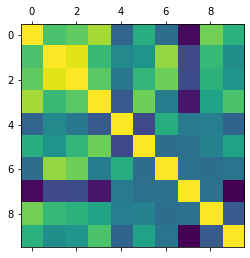

In [21]:
plt.figure(figsize=(20, 10))
plt.matshow(viewsdata.corr())

Creating 5th model with Ad_impressions

In [23]:
X = viewsdata[['weekend', 'Character_A', 'Visitors', 'Ad_impression']]
y = viewsdata[['Views_show']]

lr5 = LinearRegression()
lr5.fit(X, y)
lr5.score(X, y)  #better!

0.802946464753367

In [24]:
#Without visitors
X = viewsdata[['weekend', 'Character_A', 'Ad_impression']]
y = viewsdata[['Views_show']]

lr6 = LinearRegression()
lr6.fit(X, y)
lr6.score(X, y)  #similar

0.8026434468575648

6th model checking if a cricket match has any effect

In [26]:
X = viewsdata[['weekend', 'Character_A', 'Ad_impression', 'Cricket_match_india']]
y = viewsdata[['Views_show']]

lr7 = LinearRegression()
lr7.fit(X, y)
lr7.score(X, y)  #slightly better

0.8033255802078568

## Making predictions using lr7

In [27]:
X = viewsdata[['weekend', 'Character_A', 'Ad_impression', 'Cricket_match_india']]
pred_views = lr7.predict(X)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(viewsdata.Views_show, pred_views)
mse = mean_squared_error(viewsdata.Views_show, pred_views)

print("R2 score: ", r2)
print("MSE: ", mse)

R2 score:  0.8033255802078568
MSE:  4661484014.429767


## Regression plot (Actual vs. Predicted)

Text(0.5, 0.98, 'Regression plot')

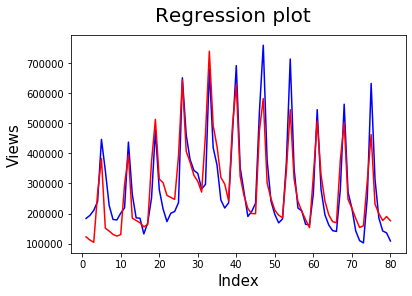

In [40]:
c = [i for i in range(1, 81)]  #X is 80 entries
fig = plt.figure()
plt.plot(c, viewsdata.Views_show, color="blue", linewidth=1.5)
plt.plot(c, pred_views, color="red", linewidth=1.5)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Views', fontsize=15)
fig.suptitle("Regression plot", fontsize=20)